# **Data Cleaning**

---






**Explanation:** We start off by loading our dataset into a data frame and only adding the necessary columns. Additionally, we cleaned 3 columns and replaced their values to something more usable so we wouldn't encounter problems later.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr

df = pd.read_csv('diabetic_data.csv')
cols = [2,3,4,6,7,8,9,12,14,16,21,22,23,41,48,49]
df = df[df.columns[cols]]
df
df['max_glu_serum'] = df['max_glu_serum'].fillna('None')
df['A1Cresult'] = df['A1Cresult'].fillna('None')
df['race'] = df['race'].replace(['?'], 'Other')
df
#df.groupby('diabetesMed').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
#plt.gca().spines[['top', 'right',]].set_visible(False)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_emergency,number_diagnoses,max_glu_serum,A1Cresult,insulin,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,1,0,1,None,None,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,18,0,9,None,None,Up,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,13,0,6,None,None,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,16,0,7,None,None,Up,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,8,0,5,None,None,Steady,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,16,0,9,None,>8,Down,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,18,0,9,None,None,Steady,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,53,9,0,13,None,None,Down,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,45,21,0,9,None,None,Up,Yes,NO


**Explanation:** Here, our data also had a mapping csv: we used the information in that csv file to convert the numerical values with their categorical names, so that for EDA we could utilize that data in the visualizations.

In [ ]:
#foradmissiontype column

# Mapping dictionary
admission_type_mapping = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped'
}

# Apply the mapping to the column
df['admission_type_description'] = df['admission_type_id'].map(admission_type_mapping)



#for discharge disposition type

# Mapping dictionary
discharge_disposition_mapping = {
    1: 'Discharged to home',
    2: 'Discharged/transferred to another short term hospital',
    3: 'Discharged/transferred to SNF',
    4: 'Discharged/transferred to ICF',
    5: 'Discharged/transferred to another type of inpatient care institution',
    6: 'Discharged/transferred to home with home health service',
    7: 'Left AMA',
    8: 'Discharged/transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharged to another hospital for neonatal aftercare',
    11: 'Expired',
    12: 'Still patient or expected to return for outpatient services',
    13: 'Hospice / home',
    14: 'Hospice / medical facility',
    15: 'Discharged/transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred/referred to this institution for outpatient services',
    18: 'NULL',
    19: 'Expired at home. Medicaid only, hospice.',
    20: 'Expired in a medical facility. Medicaid only, hospice.',
    21: 'Expired, place unknown. Medicaid only, hospice.',
    22: 'Discharged/transferred to another rehab fac including rehab units of a hospital',
    23: 'Discharged/transferred to a long term care hospital',
    24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare',
    25: 'Not Mapped',
    26: 'Unknown/Invalid',
    27: 'Discharged/transferred to a federal health care facility',
    28: 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    29: 'Discharged/transferred to a Critical Access Hospital (CAH)',
    30: 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'
}

# Apply the mapping to the column
df['discharge_disposition_description'] = df['discharge_disposition_id'].map(discharge_disposition_mapping)

##for admission source type

# Mapping dictionary
admission_source_mapping = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from a hospital',
    5: 'Transfer from a Skilled Nursing Facility (SNF)',
    6: 'Transfer from another health care facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: 'Not Available',
    10: 'Transfer from critical access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: 'Not Available',
    17: 'NULL',
    18: 'Transfer From Another Home Health Agency',
    19: 'Readmission to Same Home Health Agency',
    20: 'Not Mapped',
    21: 'Unknown/Invalid',
    22: 'Transfer from hospital inpt/same fac reslt in a sep claim',
    23: 'Born inside this hospital',
    24: 'Born outside this hospital',
    25: 'Transfer from Ambulatory Surgery Center',
    26: 'Transfer from Hospice'
}

# Apply the mapping to the column
df['admission_source_description'] = df['admission_source_id'].map(admission_source_mapping)

df




,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_emergency,number_diagnoses,max_glu_serum,A1Cresult,insulin,diabetesMed,readmitted,admission_type_description,discharge_disposition_description,admission_source_description
0,Caucasian,Female,[0-10),6,25,1,1,41,1,0,1,None,None,No,No,NO,NULL,Not Mapped,Physician Referral
1,Caucasian,Female,[10-20),1,1,7,3,59,18,0,9,None,None,Up,Yes,>30,Emergency,Discharged to home,Emergency Room
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,13,0,6,None,None,No,Yes,NO,Emergency,Discharged to home,Emergency Room
3,Caucasian,Male,[30-40),1,1,7,2,44,16,0,7,None,None,Up,Yes,NO,Emergency,Discharged to home,Emergency Room
4,Caucasian,Male,[40-50),1,1,7,1,51,8,0,5,None,None,Steady,Yes,NO,Emergency,Discharged to home,Emergency Room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,16,0,9,None,>8,Down,Yes,>30,Emergency,Discharged/transferred to SNF,Emergency Room
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,18,0,9,None,None,Steady,Yes,NO,Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF)
101763,Caucasian,Male,[70-80),1,1,7,1,53,9,0,13,None,None,Down,Yes,NO,Emergency,Discharged to home,Emergency Room
101764,Caucasian,Female,[80-90),2,3,7,10,45,21,0,9,None,None,Up,Yes,NO,Urgent,Discharged/transferred to SNF,Emergency Room


**Explanation:** Lastly, for data cleaning: we made a copy of the dataframe and encoded the copy using mapping. The encoded copy of the data frame will be used later to train the supervised models in our project.

In [ ]:


import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_copy = df.copy()

# Define the mappings for categorical columns
mappings = {
    'race': {'Caucasian': 0, 'AfricanAmerican': 1, 'Asian': 2, 'Hispanic': 3, 'Other': 4},
    'gender': {'Female': 0, 'Male': 1},
    'age': {'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9},
     'diabetesMed': {'Yes': 1, 'No': 0},
    'max_glu_serum': {'None': 0, 'Norm': 1, '>200': 2, '>300': 3},
    'A1Cresult': {'None': 0, 'Norm': 1, '>7': 2, '>8': 3},
    'insulin': {'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3},
    'readmitted': {'NO': 0, '>30': 1, '<30': 1}

}

# Apply the mappings
for column, mapping in mappings.items():
    if column in df_copy.columns:
        df_copy[column] = df_copy[column].map(mapping)

# Drop rows with any remaining NaN values
df_copy.dropna(inplace=True)

# Display the encoded DataFrame
print(df_copy.head())

   race  gender  age  admission_type_id  discharge_disposition_id  \
0     0     0.0    0                  6                        25   
1     0     0.0    1                  1                         1   
2     1     0.0    2                  1                         1   
3     0     1.0    3                  1                         1   
4     0     1.0    4                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_medications  \
0                    1                 1                  41                1   
1                    7                 3                  59               18   
2                    7                 2                  11               13   
3                    7                 2                  44               16   
4                    7                 1                  51                8   

   number_emergency  number_diagnoses  max_glu_serum  A1Cresult  insulin  \
0                 0   

# **Exploratory Data Analysis**

---


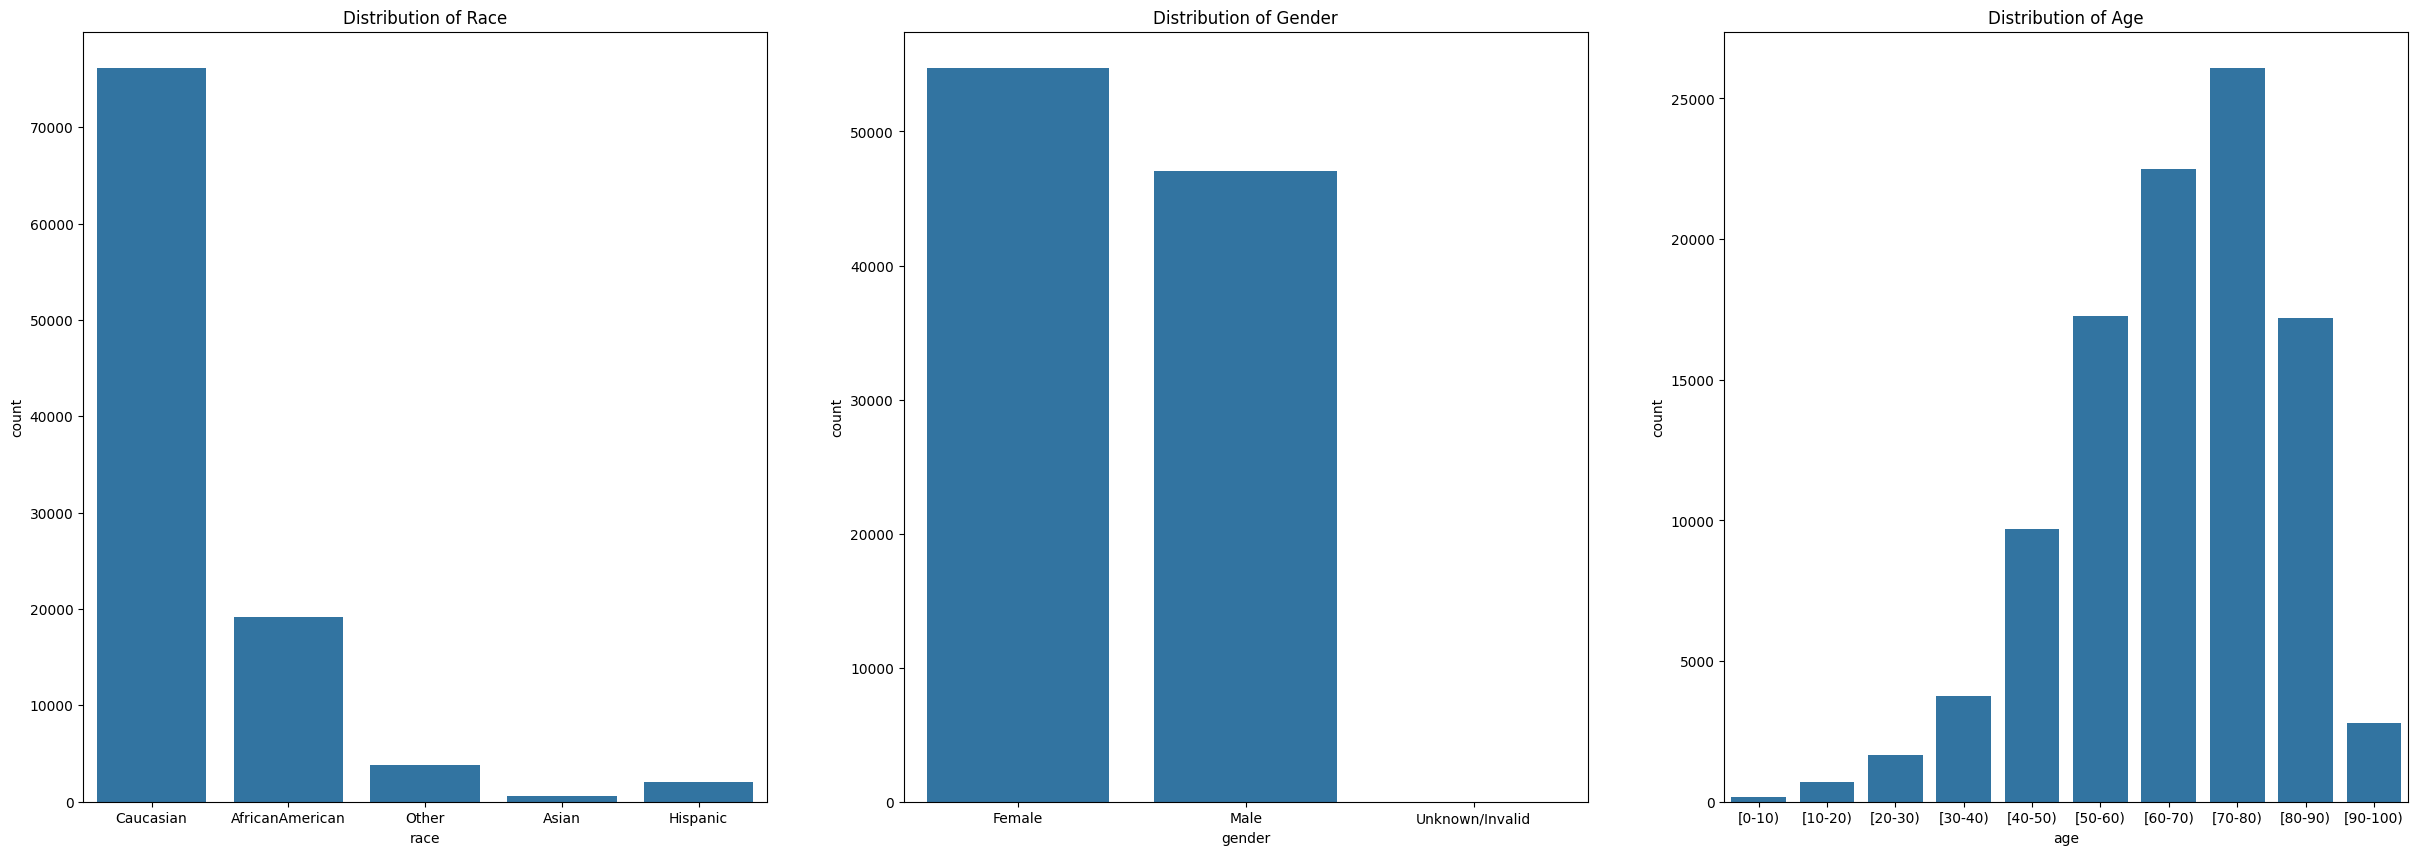

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# 'race', 'gender', and 'age' are the demographic variables

# Set up the figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Plot distribution of 'race'
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=df, ax=axes[0])
axes[0].set_title('Distribution of Race')

# Plot distribution of 'gender'
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df, ax=axes[1])
axes[1].set_title('Distribution of Gender')

# Plot distribution of 'age'
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df, ax=axes[2])
axes[2].set_title('Distribution of Age')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


**Explanation:** Based on the different visualizations above which show the distribution of different demographic variables we can see that for the distribution of race, Caucasians have the highest count in this dataset. This could mean that in the US, Caucasians are more likely to be admitted into hospitals for diabetic encounters. We can also see that there is a higher count for females versus males, indicating that females again are more likely to be admitted into hospitals for diabetic encounters. The last demographic variable we looked at was age, we can see that the counts of frequency in this dataset increase as the ages get larger.

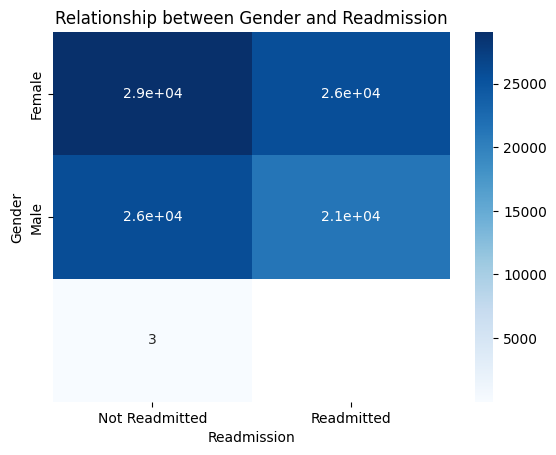

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# 'gender' is the column representing gender ('Female' and 'Male')
# 'readmitted' is the column representing readmission ('NO', '>30', '<30')
readmitted_mapping = {'NO': 'Not Readmitted', '>30': 'Readmitted', '<30': 'Readmitted'}

# Map 'readmitted' column
df['readmitted'] = df['readmitted'].map(readmitted_mapping)

# Create a pivot table to aggregate data for heatmap
pivot_table = df.pivot_table(index='gender', columns='readmitted', aggfunc='size')

sns.heatmap(pivot_table, cmap='Blues', annot=True)
plt.title('Relationship between Gender and Readmission')
plt.xlabel('Readmission')
plt.ylabel('Gender')
plt.xticks([0.5, 1.5], ['Not Readmitted', 'Readmitted'])
plt.yticks([0.5, 1.5], ['Female', 'Male'])  # Assuming 0 represents Female and 1 represents Male
plt.show()


**Explanation:** From this heatmap that shows the relationship between gender and readmission, we can see that for both genders there is a higher likelihood of not getting readmitted. As there are higher numbers for not readmitted versus readmitted for each gender. Thus we can conclude that when it comes to gender there isn't much of a correlation to readmission.

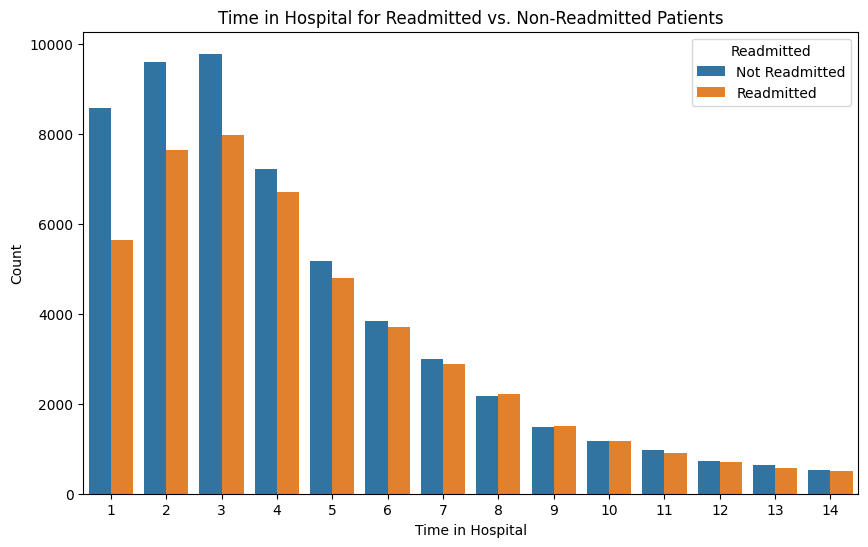

In [ ]:


# Assuming df is your DataFrame containing the data
# 'time_in_hospital' is the column representing the time spent in the hospital
# 'readmitted' is the column representing whether the patient was readmitted or not

# Mapping for 'readmitted' column
readmitted_mapping = {'NO': 'Not Readmitted', '>30': 'Readmitted', '<30': 'Readmitted'}

# Map 'readmitted' column
df['readmitted'] = df['readmitted'].map(readmitted_mapping)

# Create a bar plot to compare the distribution of hospital stay duration for readmitted and non-readmitted patients
plt.figure(figsize=(10, 6))
sns.countplot(x='time_in_hospital', hue='readmitted', data=df)
plt.title('Time in Hospital for Readmitted vs. Non-Readmitted Patients')
plt.xlabel('Time in Hospital')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()



**Explanation:**From the visual above we can see that there might be a correlation between days spent in the hospital and whether or not a patient was readmitted for time in the hospital being less than 4, but as the time in hospital gets larger, there seems to be an even likelihood between being readmitted or not based on the time spend in the hospital.

In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# 'time_in_hospital' is the column representing time in hospital

# Define the bins for 'Time in Hospital'
# You can adjust the bin edges and labels as needed
bins = [0, 3, 6, 9, 12, 15]  # Assuming you want bins of size 3
labels = ['1-3', '4-6', '7-9', '10-12', '13-14']  # Adjust labels accordingly

# Create a new column for 'Time in Hospital' bins
df['time_in_hospital_bins'] = pd.cut(df['time_in_hospital'], bins=bins, labels=labels, right=False)

# Now, 'time_in_hospital_bins' contains categorical bins for 'Time in Hospital'
df[['time_in_hospital', 'time_in_hospital_bins']].head()


contingency_table = pd.crosstab(df['time_in_hospital_bins'], df['readmitted'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-square test:")
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi-square test:
Chi2 value: 409.61042563859974
P-value: 1.6461709312719476e-83


**Explanation:**Chi-square test results: this test examines the relationship between 'Time in Hospital' and 'Readmission' status, revealing a **strong association**. With a Chi-square value of 409.61 and a small p-value of approximately 1.65e-83, we can conclude that there is a statistical significance of this association. This implies that the duration of a patient's hospital stay significantly impacts their likelihood of readmission.

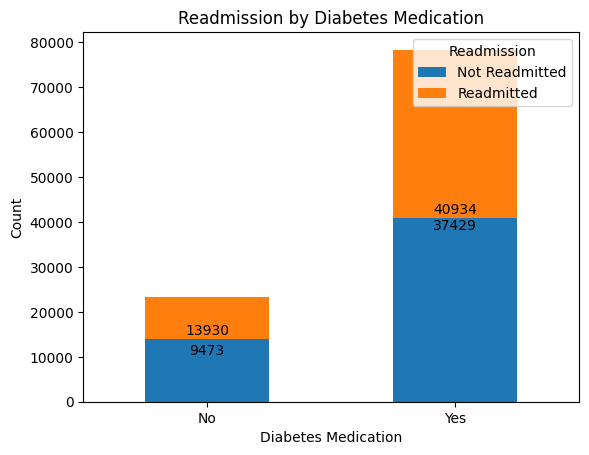

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# 'diabetesMed' is the column representing whether diabetes medication was prescribed (Yes or No)
# 'readmitted' is the column representing readmission status (Readmitted vs. Non-Readmitted)

readmitted_mapping = {'NO': 'Not Readmitted', '>30': 'Readmitted', '<30': 'Readmitted'}

# Map 'readmitted' column
df['readmitted'] = df['readmitted'].map(readmitted_mapping)

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# 'diabetesMed' is the column representing whether diabetes medication was prescribed (Yes or No)
# 'readmitted' is the column representing readmission status (Readmitted vs. Non-Readmitted)

# Create a contingency table
contingency_table = pd.crosstab(df['diabetesMed'], df['readmitted'])

# Plotting the stacked bar plot
ax = contingency_table.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Adding counts to the stacked bars
for rect in ax.patches:
    # Get x and y values
    x_value = rect.get_x() + rect.get_width() / 2
    y_value = rect.get_height()

    # Format count value and annotate
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), textcoords="offset points", xytext=(0, 3), ha='center')

# Adding labels and title
plt.title('Readmission by Diabetes Medication')
plt.xlabel('Diabetes Medication')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Adding legend
plt.legend(title='Readmission', loc='upper right')

# Show plot
plt.show()



**Explanation:**This graph depicts readmission by whether or not a patient uses diabetes medication or not. We can see that for the counts of frequency for readmission, overall there are higher counts for readmission regardless of whether the patient takes diabetes medication or not. And we can see that there is a bigger difference between readmitted and not readmitted for those who do not take diabetes medication. Suggesting that those who currently do not take diabetes medication might be likely to be readmitted. But we can conduct a Chi square test to further see if there is any correlation at all.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame containing the data
# 'diabetesMed' is the column representing whether diabetes medication was prescribed (Yes or No)
# 'readmitted' is the column representing readmission status (Readmitted vs. Not Readmitted)

# Create a contingency table
contingency_table = pd.crosstab(df['diabetesMed'], df['readmitted'])

# Perform Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results:")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


Chi-square test results:
Chi-square value: 384.71720989943293
P-value: 1.1694104072313729e-85


**Explanation:** Chi-Square test results-- Looking at these results, with a calculated Chi-square value of 384.72 and a low p-value of approximately 1.17e-85, this suggests that there is a highly significant association between these variables. Therefore, we reject the null hypothesis, which means there is a strong link between whether or not a patient takes diabetes medication and the likelihood of patient readmission.





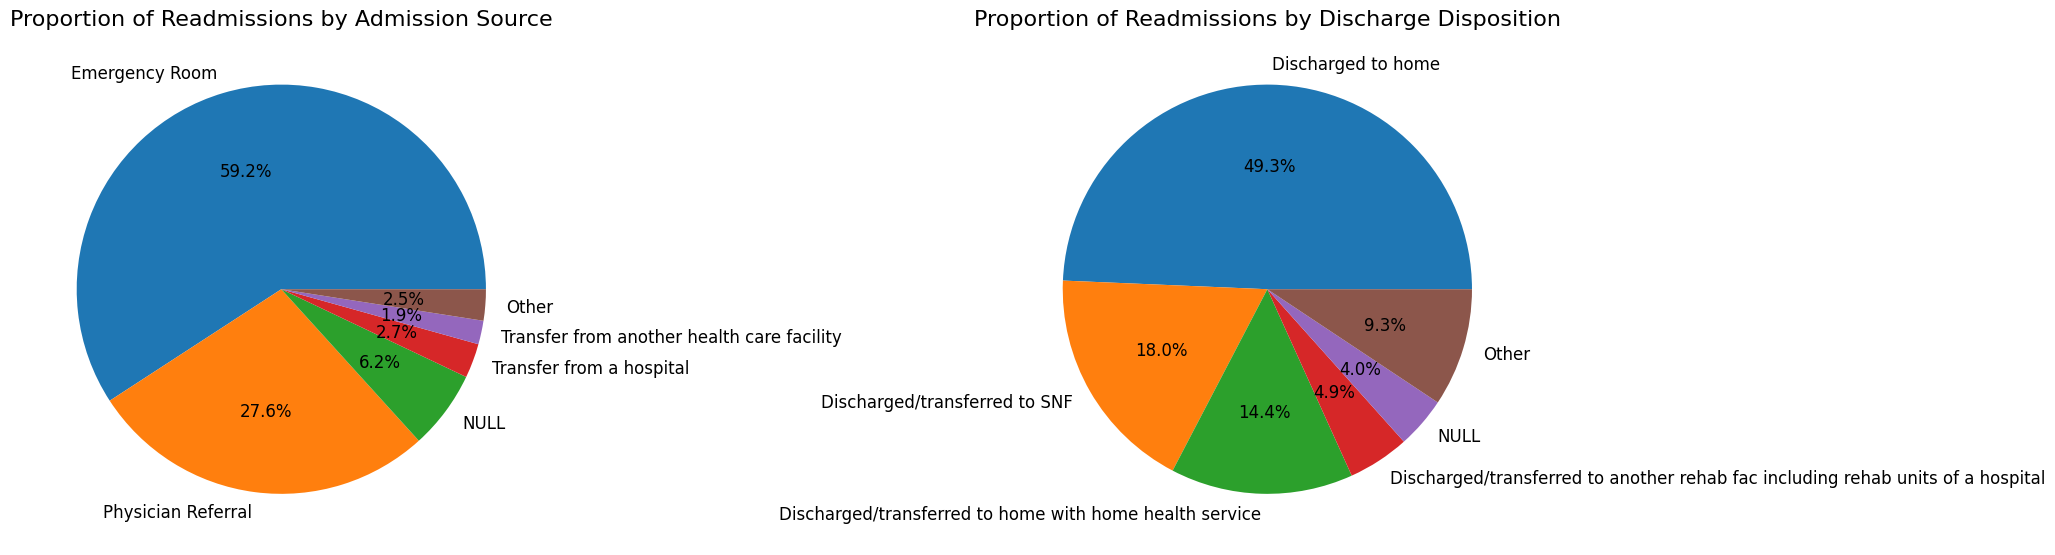

In [ ]:
df['admission_source'] = df['admission_source_id'].map(admission_source_mapping)

readmitted_df = df[df['readmitted'] == 'Readmitted']

discharge_disposition_counts = readmitted_df['discharge_disposition'].value_counts()
admission_source_counts = readmitted_df['admission_source'].value_counts()

# group similar categories into 'other' category (easier to see)
top_discharge_categories = discharge_disposition_counts.nlargest(5)
other_discharge_sum = discharge_disposition_counts[5:].sum()
discharge_disposition_counts = pd.concat([top_discharge_categories, pd.Series(other_discharge_sum, index=['Other'])])

top_admission_categories = admission_source_counts.nlargest(5)
other_admission_sum = admission_source_counts[5:].sum()
admission_source_counts = pd.concat([top_admission_categories, pd.Series(other_admission_sum, index=['Other'])])

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

admission_source_counts.plot.pie(ax=axs[0], autopct='%1.1f%%', textprops={'fontsize': 12})
axs[0].set_title('Proportion of Readmissions by Admission Source', fontsize=16)

discharge_disposition_counts.plot.pie(ax=axs[1], autopct='%1.1f%%', textprops={'fontsize': 12})
axs[1].set_title('Proportion of Readmissions by Discharge Disposition', fontsize=16)

plt.tight_layout()
plt.show()

**Explanation for "Proportion of Readmissions by Admission Source"**
Based on the data, the majority of readmissions originate from the Emergency Room, accounting for 59.2% of the cases. This is followed by Physician Referrals at 27.6%. Other sources such as transfers from other healthcare facilities, hospitals, and unspecified sources (NULL) make up the remaining proportion. This distribution suggests that emergency situations and referrals are the primary drivers for readmissions, highlighting the critical role of acute care and physician follow-ups in patient readmission rates.

**Explanation for "Proportion of Readmissions by Discharge Disposition"**
The data indicates that 49.3% of readmitted patients were originally discharged to home, which is the largest proportion. This is followed by discharges to skilled nursing facilities (SNF) at 18.0%, and discharges to home with home health services at 14.4%. Other dispositions, including transfers to other rehab facilities and unspecified (NULL) cases, contribute to the rest. This distribution suggests that patients discharged directly to home, even with home health services, have a higher likelihood of readmission compared to those discharged to more structured care environments like SNFs.

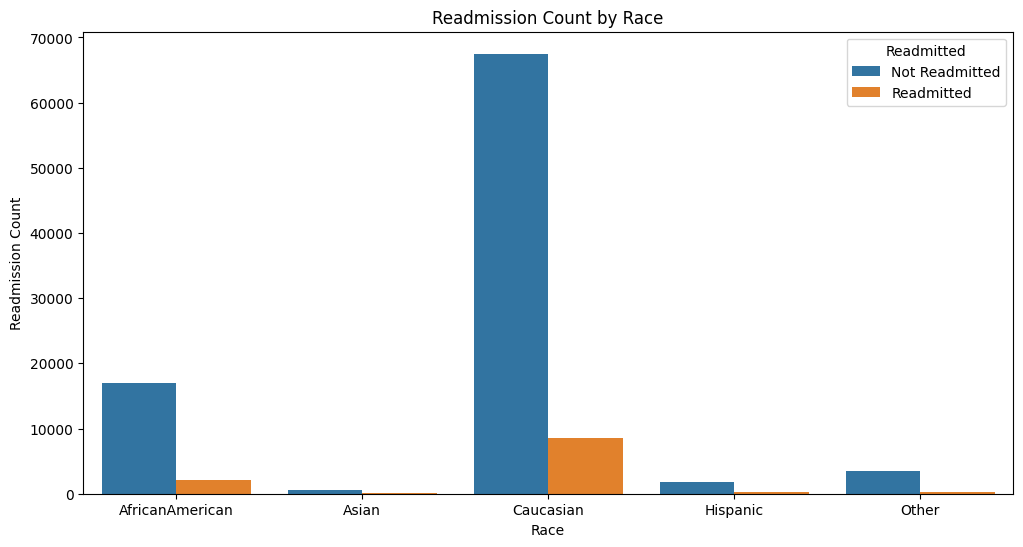

In [ ]:
df['readmitted'] = df['readmitted'].replace({'<30': 'Readmitted', '>30': 'Not Readmitted', 'NO': 'Not Readmitted'})

race_readmission_count = df.groupby(['race', 'readmitted']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=race_readmission_count, x='race', y='count', hue='readmitted')
plt.title('Readmission Count by Race')
plt.xlabel('Race')
plt.ylabel('Readmission Count')
plt.legend(title='Readmitted')
plt.show()

**Explanation:**
The bar chart displays the readmission count by race, highlighting that Caucasians have the highest number of readmissions, followed by African Americans. Other racial groups, such as Asians, Hispanics, and others, show significantly lower readmission counts. This distribution might be skewed as the data could be from a region where the Caucasian population is more prevalent, potentially affecting the representation of other races. Therefore, while the chart indicates a higher readmission rate among Caucasians, it is essential to consider regional demographics to understand the data accurately.

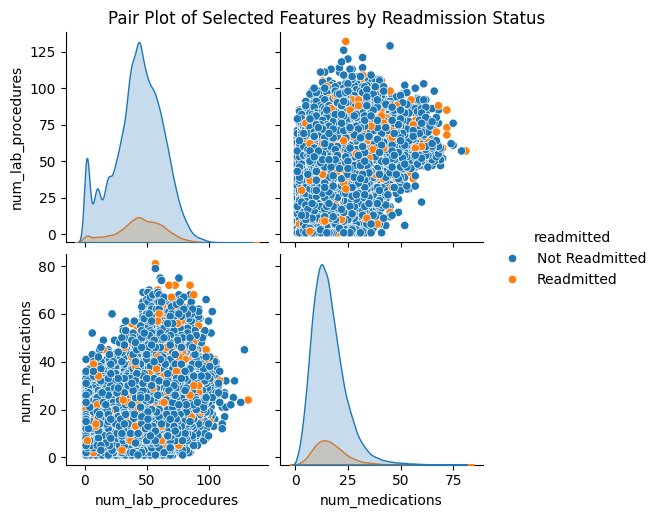

In [ ]:
selected_columns = ['num_lab_procedures', 'num_medications', 'readmitted']

df['readmitted'] = df['readmitted'].replace({'<30': 'Readmitted', '>30': 'Not Readmitted', 'NO': 'Not Readmitted'})

sns.pairplot(df[selected_columns], hue='readmitted')
plt.suptitle('Pair Plot of Selected Features by Readmission Status', y=1.02)
plt.show()

**Explanation:**
The pair plot visualizes the relationship between the number of lab procedures and medications with readmission status. Most patients, regardless of readmission status, had fewer than 50 lab procedures and 25 medications, with a higher density of not readmitted patients in these ranges. There is a positive correlation between lab procedures and medications, with patients undergoing more procedures generally prescribed more medications. This trend indicates that the more procedures or medications a patient has, the more likely they are to be readmitted.

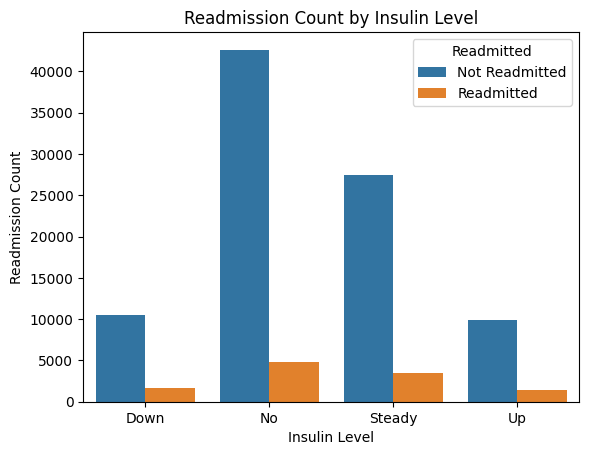

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV
df = pd.read_csv('diabetic_data.csv')

# Replace 'YES', 'NO', and '>' with meaningful labels
df['readmitted'] = df['readmitted'].replace({'<30': 'Readmitted', '>30': 'Not Readmitted', 'NO': 'Not Readmitted'})

# Count the readmissions for each insulin level
insulin_readmission_count = df.groupby(['insulin', 'readmitted']).size().reset_index(name='count')

# Bar Plot: Readmission Count by Insulin Level
sns.barplot(data=insulin_readmission_count, x='insulin', y='count', hue='readmitted')
plt.title('Readmission Count by Insulin Level')
plt.xlabel('Insulin Level')
plt.ylabel('Readmission Count')
plt.legend(title='Readmitted')
plt.show()


**Explanation:** The bar chart compares the readmission counts based on different insulin levels: Down, No, Steady, and Up. For each insulin level, the chart distinguishes between patients who were readmitted and those who were not readmitted. The "No" insulin level has the highest count of not readmitted patients, exceeding 40,000, while the readmitted count for this category is significantly lower. Similarly, the "Steady" insulin level shows a high number of not readmitted patients, around 30,000, with a much lower count for readmitted patients. The "Down" and "Up" insulin levels have smaller counts in both categories, with the not readmitted counts being higher than the readmitted ones. Overall, the chart indicates that the majority of patients, regardless of readmission status, fall under the "No" and "Steady" insulin levels, with a consistently higher number of not readmitted patients across all insulin levels.

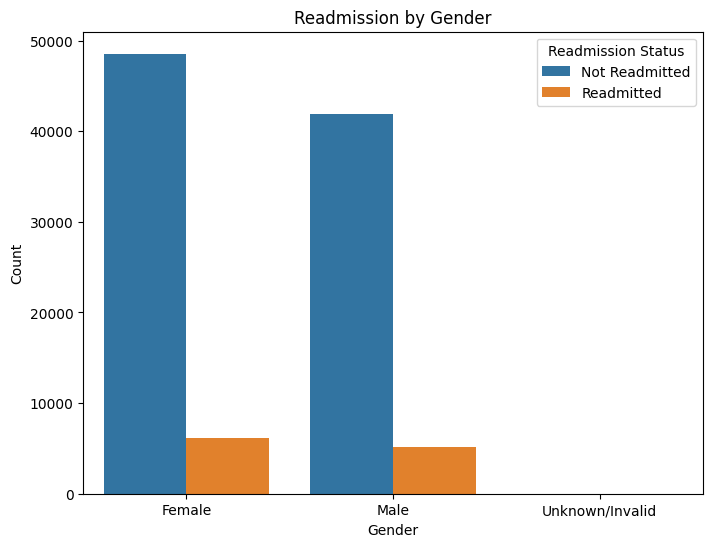

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV
df = pd.read_csv('diabetic_data.csv')

# Replace 'YES', 'NO', and '>' with meaningful labels in the 'readmitted' column
df['readmitted'] = df['readmitted'].replace({'<30': 'Readmitted', '>30': 'Not Readmitted', 'NO': 'Not Readmitted'})

# Count Plot: Readmission by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='readmitted', data=df)
plt.title('Readmission by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Readmission Status')
plt.show()


**Explanation:** The bar chart displays the readmission counts categorized by gender: Female, Male, and Unknown/Invalid. For each gender category, the chart distinguishes between patients who were readmitted and those who were not readmitted. The "Female" category has the highest count of not readmitted patients, close to 50,000, with the readmitted count being much lower. The "Male" category also shows a high number of not readmitted patients, around 45,000, with a similarly lower readmitted count. The "Unknown/Invalid" category has the smallest counts for both readmitted and not readmitted patients. Overall, the chart indicates that both female and male patients have a significantly higher number of not readmitted cases compared to readmitted cases, with the majority of patients falling under the Female and Male categories.  


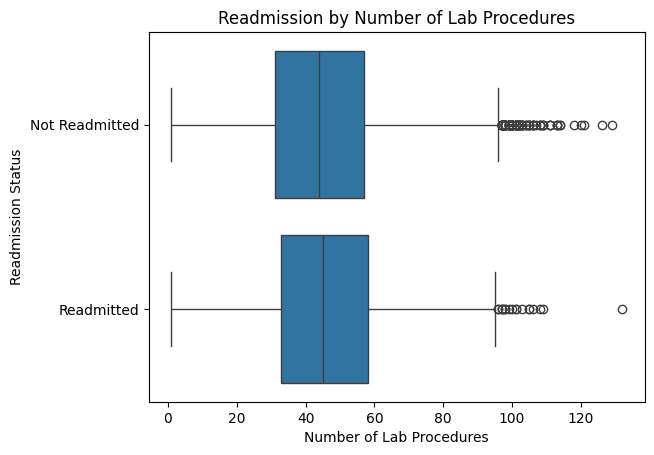

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV
df = pd.read_csv('diabetic_data.csv')

# Replace 'YES', 'NO', and '>' with meaningful labels in the 'readmitted' column
df['readmitted'] = df['readmitted'].replace({'<30': 'Readmitted', '>30': 'Not Readmitted', 'NO': 'Not Readmitted'})

# Box Plot: Readmission by Number of Lab Procedures
sns.boxplot(x='num_lab_procedures', y='readmitted', data=df)
plt.title('Readmission by Number of Lab Procedures')
plt.ylabel('Readmission Status')
plt.xlabel('Number of Lab Procedures')
plt.show()


**Explanation:** The box plot compares the number of lab procedures between patients who were readmitted and those who were not readmitted. Both groups exhibit similar median numbers of lab procedures, approximately between 45 and 50. The interquartile range (IQR), representing the spread of the middle 50% of the data, is also comparable for both groups, roughly between 30 and 70 lab procedures. Outliers are present in both groups, with the Not Readmitted group showing more prominent outliers, where some patients had up to 120 lab procedures. The overall distribution pattern is similar for both groups, indicating that the number of lab procedures does not significantly differ between patients who were readmitted and those who were not. This suggests that the number of lab procedures is not a major differentiating factor between the two groups.  

# **Supervised Learning Technique: K-Nearest Neighbor Classification, Random Forest Classifer, and Gradient Boosting Machine (GBM)**

---


**K-Nearest Neighbor Classification**

Accuracy: 0.5615388394831229
Confusion Matrix:
[[6701 4315]
 [4609 4728]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60     11016
           1       0.52      0.51      0.51      9337

    accuracy                           0.56     20353
   macro avg       0.56      0.56      0.56     20353
weighted avg       0.56      0.56      0.56     20353



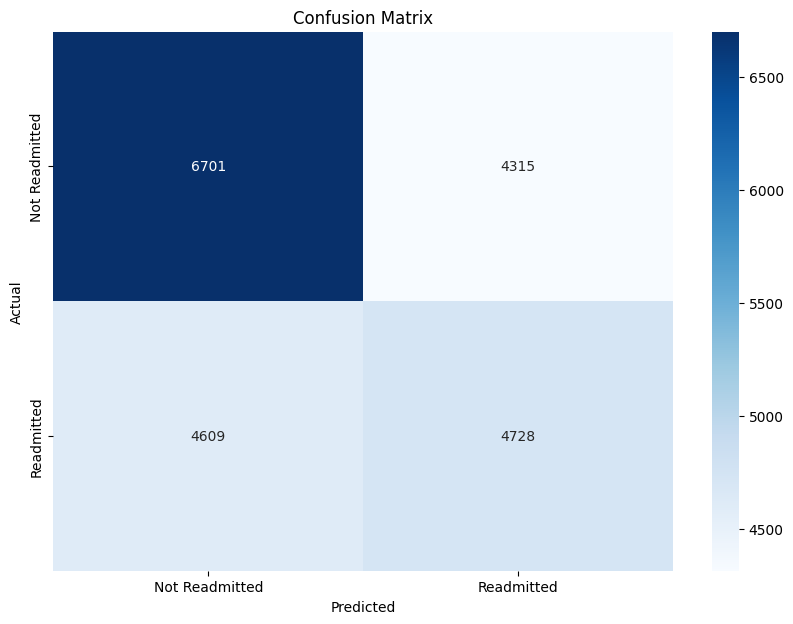

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_copy is already fully encoded and cleaned
df_copy = df_copy.dropna()

# Define the target and features
target = 'readmitted'
features = df_copy.columns.drop(target)

# Splitting the data
X = df_copy[features]
y = df_copy[target]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the KNN pipeline with StandardScaler for feature scaling
knn_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Add scaler to standardize the data
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # Change the classifier to KNeighborsClassifier
])

# Training the model
knn_pipeline.fit(X_train, y_train)

# Predicting
y_pred = knn_pipeline.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Readmitted', 'Readmitted'], yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Explanation:** Based on the KNN classification results, the model achieved an accuracy of approximately 56%. The confusion matrix reveals that out of 20,353 instances, the model correctly classified 11,429 instances (true negatives and true positives) while misclassifying 8,924 instances (false positives and false negatives). The classification report demonstrates variations in precision, recall, and F1-score for both classes (Not Readmitted and Readmitted). While the model has an okay performance in predicting whether a patient will be readmitted or not, there is potential for improvement in accuracy and achieving a better balance between precision and recall. We will try another model to see if we can reach a higher accuracy.

**Random Forest Classifier**



Accuracy: 0.5873826954257357
Confusion Matrix:
[[7266 3750]
 [4648 4689]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63     11016
           1       0.56      0.50      0.53      9337

    accuracy                           0.59     20353
   macro avg       0.58      0.58      0.58     20353
weighted avg       0.58      0.59      0.59     20353



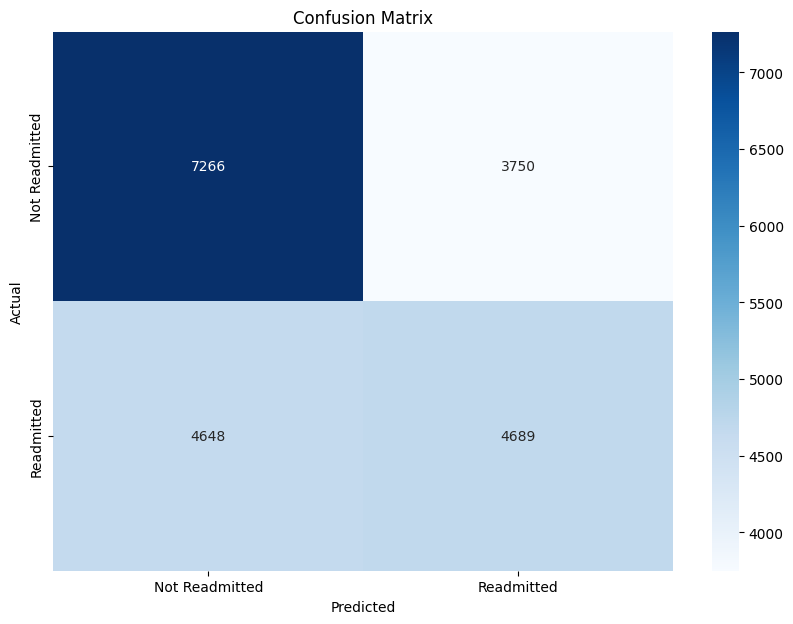

In [ ]:
##Random Forest Classifer

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_copy is already fully encoded and cleaned
df_copy = df_copy.dropna()



# Define the target and features
target = 'readmitted'
features = df_copy.columns.drop([target, "admission_type_description","discharge_disposition_description","admission_source_description"])

# Splitting the data
X = df_copy[features]
y = df_copy[target]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest pipeline (No need for preprocessing as data is already encoded)
rf_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Add scaler to standardize the data
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Training the model
rf_pipeline.fit(X_train, y_train)

# Predicting
y_pred = rf_pipeline.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Readmitted', 'Readmitted'], yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



**Explanation:**
Based on the results obtained from the Random Forest classifier, our supervised learning technique that we focused on for the project, our model achieved an accuracy of approximately 58.74%. This is higher than the results we got with KNN classification, but we can still do better.

The confusion matrix illustrates that out of 20,353 instances, the model accurately classified 11,955 instances (true negatives and true positives), while misclassifying 8,398 instances (false positives and false negatives).

The classification report further reveals variations in precision, recall, and F1-score for both classes (Not Readmitted and Readmitted), indicating a trade-off between precision and recall.

Overall, while the Random Forest model exhibits moderate performance in distinguishing between whether or not a patient will be readmitted, there is potential for improvement in accuracy and achieving a better balance between precision and recall.

**Gradient Boosting Machines (GBM)**

Accuracy: 0.6084115363828428
Confusion Matrix:
[[7716 3300]
 [4670 4667]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66     11016
           1       0.59      0.50      0.54      9337

    accuracy                           0.61     20353
   macro avg       0.60      0.60      0.60     20353
weighted avg       0.61      0.61      0.60     20353



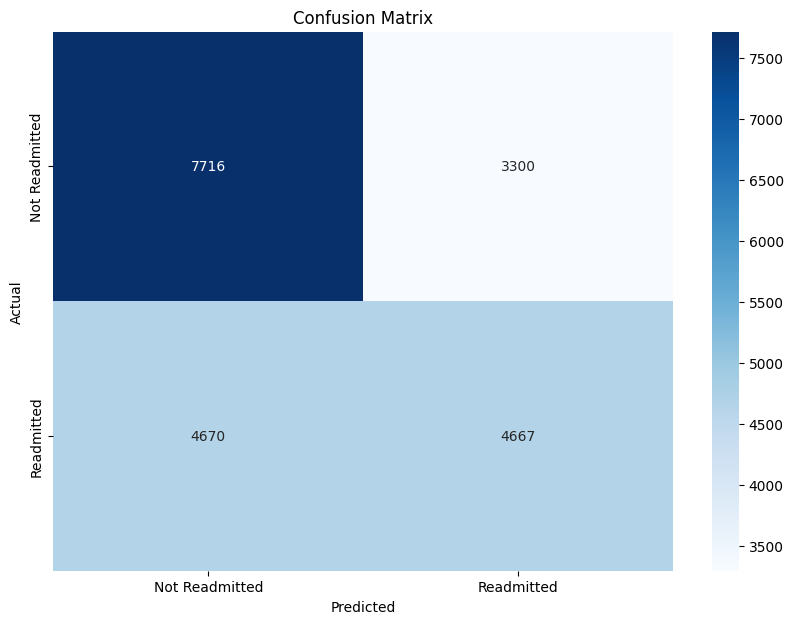

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_copy is already fully encoded and cleaned
df_copy = df_copy.dropna()



# Define the target and features
target = 'readmitted'
features = df_copy.columns.drop([target])

# Splitting the data
X = df_copy[features]
y = df_copy[target]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the GBM pipeline
gbm_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Add scaler to standardize the data
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
])

# Training the GBM model
gbm_pipeline.fit(X_train, y_train)

# Predicting
y_pred = gbm_pipeline.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Readmitted', 'Readmitted'], yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Explanation:** For the Gradient Boosting Machine (GBM) model, we achieved an accuracy of approximately 61%. In the confusion matrix, out of 20,353 instances, the model accurately classified 12,383 instances (true negatives and true positives) while misclassifying 7,970 instances (false positives and false negatives). The classification report illustrates variations in precision, recall, and F1-score for both classes (Not Readmitted and Readmitted). Notably, the precision for predicting not readmitted cases is slightly higher, indicating a better ability to correctly identify non-readmitted patients. However, the recall for predicting readmitted cases is lower, suggesting that the model may miss some instances of readmission. Overall, these results signify the best performance achieved by the GBM model with the selected features, indicating the limitations of the feature set in accurately predicting readmission outcomes.

# **Unsupervised Learning Technique: K-Means Clustering**


---



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.42996202933189787


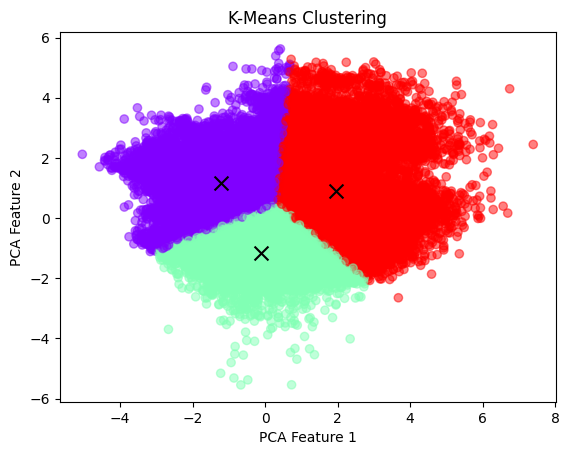

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#Standardize data
from sklearn.preprocessing import StandardScaler

label_encoders = {}
for column in df.columns:
  label_encoders[column] = LabelEncoder()   #converts categorical data into numeric values
  df[column] = label_encoders[column].fit_transform(df[column])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)      #standardizes data

# Dimensionality Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)                 #reduces dimensionality of data to 2 components, to visualize data more easily
X_pca = pca.fit_transform(scaled_data)

# Perform k-means clustering
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X_pca)
centroids = kmeans.cluster_centers_         #perform kmeans with 3 clusters
labels = kmeans.labels_

# Evaluate the clusters
avg = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {avg}")

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = labels, cmap = 'rainbow', alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 100, c = "black")
plt.title("K-Means Clustering")
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

**Explanation:** The number of clusters was determined by comparing the silhouette scores of using different 'k' clusters. 3 clusters yielded the best silhouette score of about 0.43. A silhouette score of about 0.43 tells us that there is moderately sufficient clustering but there may be outliers that make predictions of our target variable difficult. The two PCA features are comprised of different combinations of our original features, where some more strongly influence one PCA feature than the other. We can see a more clear picture of what features influence which PCA feature more with the graph below. For our data, this graph tells us that there is moderate similarity within the data, and that there is slight overlap between the clusters. We conclude that these clusters may not be the best representation for the data.

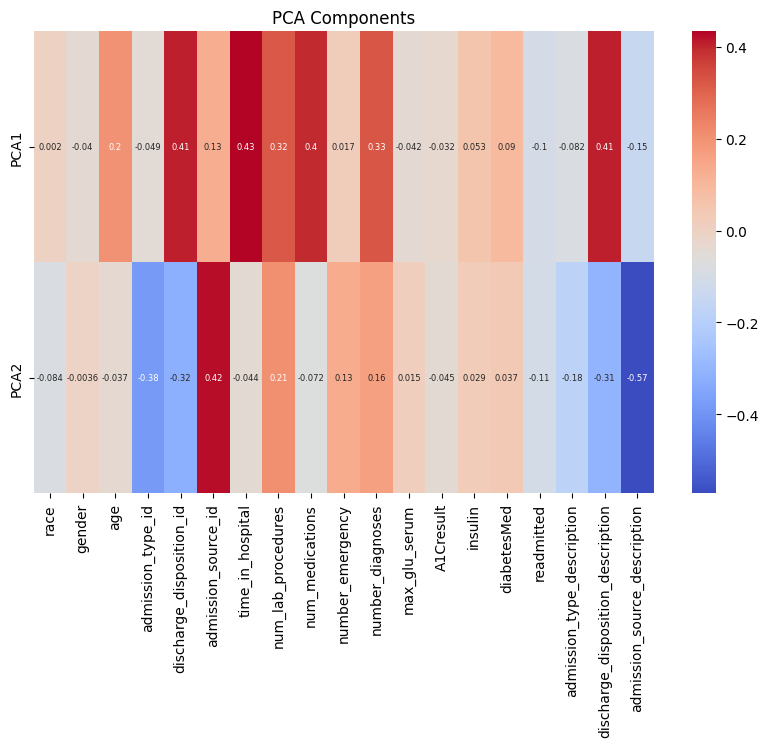

In [ ]:
# Fit PCA again to get components
pca = PCA(n_components=2)
pca.fit(scaled_data)

# Get the components
components = pca.components_

# Create a DataFrame for better visualization
feature_contributions = pd.DataFrame(components, columns=df.columns, index=['PCA1', 'PCA2'])
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(feature_contributions, annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.title('PCA Components')
plt.show()


**Explanation:** This graph tells us which features from the original dataset contribute most to the corresponding PCA feature. A positive weight feature indicates that the PCA value increases as the feature's value increases. A negative weight feature indicates that the PCA value decreases as the feature's value increases.